In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import os
import pathlib
import ntpath

In [2]:
df = pd.read_csv('../raw_data/production/1.csv')

In [51]:
df.shape

(58, 126)

In [52]:
df.isnull().sum()

Code pays déclarant      0
Code pays partenaire     0
Code Produit             0
Code Élément             0
Élément                  0
                        ..
y2018f                  46
y2019                    8
y2019f                  47
y2020                   58
y2020f                  58
Length: 126, dtype: int64

In [ ]:
# a  = set()
# for path in pathlib.Path("../raw_data/Prod").iterdir():
#     df = pd.read_csv(path, low_memory=False)
#     a.update(df.element.unique())
# print(a)

## Fonction de nettoyage de données

In [ ]:
# for path in pathlib.Path("../raw_data/production").iterdir():
#     df = pd.read_csv(path, low_memory=False)
    
#     #Garder que les production
#     df = df[(df.element=='Production')]   
       
#     #Creer les colonnes 'y2020' et 'y2020f'
#     df['y2020'] = np.nan
#     df['y2020f'] = np.nan
    
#     # Supprimer les pays et les produits
#     del df['area']
#     del df['item']
    
#     nom_col = df.columns[5 : ,]
#     col, col_annee  = [], []
    
#     for i in nom_col : 
#         if i.endswith('f') :
#             col.append(i)
            
#     for i in nom_col :
#         if i not in col : 
#             col_annee.append(i)
            
#     # col = ['y' + str(y) for y in range(1961, 2021) + 'f']
#     # col_annee = ['y' + str(y) for y in range(1961, 2021)]
    
    
#     #Ajouter le code pays partenaire 
#     df.insert(2, "Code pays partenaire", df['area_code'], allow_duplicates=False)
    
#     #Remplacer les Symboles par leurs correspondances 
#     for i in col :
#         df[i] = df[i].map(
#                      {'*':'Non-officiel',
#                      'A':'Agrégat',
#                      ' ': 'Officiel',
#                      'F':'Estimation FAO',
#                      'lm':'Imputation FAO',
#                      'M':'N/A',
#                      'R':'Estim partenaires'
#                      }
#                   )   
#         df[i] = df[i].fillna('Officiel')
        
#     #Remplacer les NaN dans les années par  -100000
#     for j in col_annee :
#         df[j] = df[j].fillna(-100000)

#     #Convertir en .csv
#     df.to_csv(str(ntpath.basename(path)), index=False)

In [18]:
# col_annee = ['y' + str(y) for y in range(1961, 2021)]

# fig2 = px.area(df, x=col_annee, y=, color="Item", line_group="Item", title='Production de chaque pays selon l annee')
# fig2.show()

In [1]:
# global_produce = production.loc[(production.Element == 'Production')  & (production.Year == 2019)]
# global_produce
# countries = production.Area.unique()
# area = []
# amnt = []
# for country in countries:
#     temp = global_produce.loc[global_produce.Area == country]
#     amount = temp.Value.sum()
#     area.append(country)
#     amnt.append(amount)
# data_global = pd.DataFrame({'Country': area, 'Amount': amnt})
# data_global = data_global.sort_values(by=['Amount'], ascending=False)

In [2]:
# fig = px.bar(data_global, x=data_global.Country[1:20], y=data_global.Amount[1:20], title='Countries with highest Crop Production in 2019',color=data_global.Amount[1:20],
#              labels={'x': 'Country', 'y': 'Amount (tonnes)', 'color': 'Amount- Tonnes'})
# fig.show()

In [ ]:
# for path in pathlib.Path("../raw_data/production").iterdir():
#     df = pd.read_csv(path, low_memory=False)
#     df = df.replace('Officiel', '')
#     df = df.replace(-100000, np.nan)
    
#     #Convertir en .csv
#     df.to_csv(str(ntpath.basename(path)), index=False)

## Le fonction select_payspart

In [3]:
df_pays = pd.read_csv('../raw_data/commerce/68.csv', low_memory=False)
df_pays.tail(5)

,Code pays déclarant,Code pays partenaire,Code Produit,Code Élément,Élément,Unité,y1961,y1961f,y1962,y1962f,...,y2016,y2016f,y2017,y2017f,y2018,y2018f,y2019,y2019f,y2020,y2020f
123549,68,181,1035,5922,Exportations - Valeur,US$,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123550,68,181,564,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123551,68,181,564,5622,Importations - Valeur,US$,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123552,68,181,564,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,3.0,NaN,2.0,NaN,11.0,NaN,11.0,NaN,0.0,NaN
123553,68,181,564,5922,Exportations - Valeur,US$,NaN,NaN,NaN,NaN,...,36.0,NaN,41.0,NaN,69.0,NaN,26.0,NaN,5.0,NaN


## Fonction pour changer les noms et l'ordre des colonnes 

In [41]:

# for path in pathlib.Path("../raw_data/production").iterdir():
#     df = pd.read_csv(path, low_memory=False)    

#     df = df.reindex(columns=(['area_code'] + ['Code pays partenaire'] + list([a for a in df.columns if (a != 'area_code') and (a != 'Code pays partenaire')] )))
#     df.set_axis(list(df_pays.columns), axis='columns', inplace=True)
    
#     #Convertir en .csv
#     df.to_csv(str(ntpath.basename(path)), index=False)

In [42]:
def select_payspart(liste_payspart):
    
    df = merge_prod_exch(countrycodes_list)
    df_pays_part = pd.DataFrame()
    for i in liste_payspart :     
        
     return select_valeurs(liste_payspart, 'pays partenaire')

In [ ]:
def merge_prod_exch(countrycodes_list):
    """
    Renvoie les données de production et d'échange des countries dans un même dataframe
    """
    countrycodes_list = set(list(countrycodes_list))
    
    merged_df = pd.DataFrame()
    
    for countrycode in countrycodes_list:
        filename = str(countrycode) + '.csv'
        
        fao_filepath = os.path.join(FAO_FOLDER, filename)
        
        prod_filepath = os.path.join(PROD_FOLDER, filename)
        
        try:
            df_fao = pd.read_csv(fao_filepath, low_memory=False)
        except:
            df_fao = None
        try:
            df_prod = pd.read_csv(prod_filepath, low_memory=False)
        except:
            
            df_prod=None
            
        if df_fao:
            if df_prod:
                country_df = pd.concat([df_fao, df_prod])
                country_df = country_df[country_df['Code Produit']!='Code Produit']
                merged_df = pd.concat([merged_df, country_df])
            else:
                merged_df = df_fao
        elif df_prod:
            merged_df = df_prod
        else:
            raise ValueError("Impossible de trouver {}.".format(countrycode))
    return merged_df

In [4]:
data_merged = pd.read_csv('../raw_data/merged.csv', low_memory=False )
data_merged.head(10)

data_merged.describe()

,Code pays déclarant,Code pays partenaire,Code Produit,Code Élément,y1961,y1962,y1963,y1964,y1965,y1966,...,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020
count,141852.000000,141852.000000,141852.000000,141852.000000,8.800000e+01,8.800000e+01,8.800000e+01,8.900000e+01,8.900000e+01,8.900000e+01,...,5.612900e+04,5.877900e+04,5.970700e+04,6.136400e+04,6.285000e+04,6.203800e+04,6.484700e+04,6.578000e+04,6.761900e+04,6.747000e+04
mean,59.407967,130.571095,568.923216,5789.570094,1.545835e+06,1.746928e+06,1.743104e+06,1.724392e+06,1.836639e+06,1.627948e+06,...,9.200400e+03,8.544046e+03,8.598602e+03,8.822126e+03,8.275859e+03,7.667525e+03,8.259349e+03,7.798311e+03,7.611175e+03,3.416490e+03
std,22.401935,72.755859,347.751174,148.405214,3.975083e+06,4.545086e+06,4.522640e+06,4.566725e+06,4.895190e+06,4.263093e+06,...,4.031629e+05,3.935394e+05,3.905789e+05,4.208295e+05,4.077644e+05,3.383531e+05,4.235846e+05,3.708547e+05,3.899370e+05,3.814276e+04
min,1.000000,1.000000,15.000000,5510.000000,2.800000e+02,2.600000e+02,1.700000e+02,2.000000e+01,1.000000e+01,1.000000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,68.000000,69.000000,258.000000,5622.000000,9.927500e+03,9.578500e+03,9.895500e+03,7.710000e+03,7.970000e+03,8.690000e+03,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,68.000000,126.000000,560.000000,5910.000000,7.606600e+04,6.759500e+04,8.289950e+04,8.130700e+04,7.534000e+04,6.849000e+04,...,3.100000e+01,2.600000e+01,2.600000e+01,2.500000e+01,2.100000e+01,2.200000e+01,2.100000e+01,2.100000e+01,1.900000e+01,1.800000e+01
75%,68.000000,198.000000,846.000000,5922.000000,3.270075e+05,3.213450e+05,3.610950e+05,3.885500e+05,3.874100e+05,3.410000e+05,...,4.150000e+02,3.650000e+02,3.700000e+02,3.520000e+02,3.080000e+02,3.140000e+02,3.040000e+02,3.020000e+02,2.750000e+02,2.650000e+02
max,68.000000,299.000000,1841.000000,5922.000000,2.080248e+07,2.530510e+07,2.536731e+07,2.605047e+07,2.913075e+07,2.673765e+07,...,6.395488e+07,6.834173e+07,6.753768e+07,7.257932e+07,7.287585e+07,5.439870e+07,6.873024e+07,6.183948e+07,7.037889e+07,3.888370e+06


In [72]:
data_import = data_merged[data_merged.Élément == 'Importations - Quantité'].sort_values(by= 'y1988',ascending=False)
data_import.head(10)

,Code pays déclarant,Code pays partenaire,Code Produit,Code Élément,Élément,Unité,y1961,y1961f,y1962,y1962f,...,y2016,y2016f,y2017,y2017f,y2018,y2018f,y2019,y2019f,y2020,y2020f
35400,68,21,238,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,1732691.0,NaN,1715315.0,NaN,1639598.0,NaN,2017855.0,NaN,1713607.0,NaN
129259,68,211,631,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,877677.0,NaN,1199350.0,NaN,1235936.0,NaN,1414589.0,NaN,1186952.0,NaN
105142,68,150,1034,5608,Importations - Quantité,Unité,NaN,NaN,NaN,NaN,...,28061.0,NaN,38872.0,NaN,28591.0,NaN,35247.0,NaN,35507.0,NaN
32387,68,15,1034,5608,Importations - Quantité,Unité,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32595,68,15,238,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78191,68,106,564,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,85523.0,NaN,98641.0,NaN,79773.0,NaN,88719.0,NaN,74326.0,NaN
118976,68,229,976,5608,Importations - Quantité,Unité,NaN,NaN,NaN,NaN,...,12338.0,NaN,NaN,NaN,6951.0,NaN,427.0,NaN,729.0,NaN
56125,68,203,490,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,336638.0,NaN,334542.0,NaN,306715.0,NaN,321943.0,NaN,309553.0,NaN
58055,68,231,846,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,7.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
72605,68,101,128,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
data_export = data_merged[data_merged.Élément == 'Exportations - Quantité']
data_export.head(10)

,Code pays déclarant,Code pays partenaire,Code Produit,Code Élément,Élément,Unité,y1961,y1961f,y1962,y1962f,...,y2016,y2016f,y2017,y2017f,y2018,y2018f,y2019,y2019f,y2020,y2020f
8,1,2,828,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,220.0,NaN
22,1,2,831,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
43,1,202,634,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
57,1,202,828,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
65,1,202,631,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,18.0,NaN
147,1,202,826,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,1,3,828,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,1,4,623,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1,79,868,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,1,79,1036,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
def get_top_product_per_country_per_year(df, country_code, year, nb_items):
    return df[(df.element == 'Production') & (df["area_code"]==country_code)].sort_values(by=f'y{year}',ascending=False).head(nb_items)

In [88]:
def product_emport(data_import, code_contry, year ):
    return data_import[data_import["Code pays déclarant"]==code_contry ].sort_values(by=data_import['y' + str(year)], ascending=False)

In [ ]:
perc = ((production.isnull().sum()/production.isnull().count())*100).sort_values(ascending=False)
values = pd.concat([missing, perc], axis=1, keys=['Missing_Number', 'Missing_Percent'])
values.head(50)

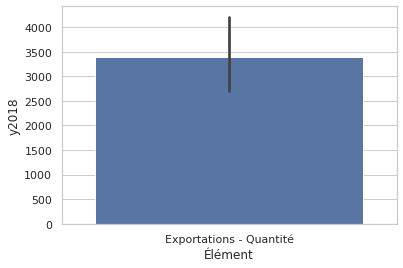

In [99]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Élément", y='y2018', data=data_export)

In [8]:
partnercodes_list = [2, 3]
elementcodes_list = [5610, 5622]

In [56]:

def select_element(df, elementcodes_list):
    new_data = df.copy()
    
    if elementcodes_list == ['*'] or elementcodes_list =='*':
        elementcodes_list = df['Code Élément'].unique()
        
    liste_statuts = new_data.loc[new_data['Code Élément'].isin(elementcodes_list), :]
    
    return liste_statuts

In [57]:
select_element(data_merged, elementcodes_list)

,Code pays déclarant,Code pays partenaire,Code Produit,Code Élément,Élément,Unité,y1961,y1961f,y1962,y1962f,...,y2016,y2016f,y2017,y2017f,y2018,y2018f,y2019,y2019f,y2020,y2020f
0,1,2,527,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,527,5622,Importations - Valeur,US$,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,221,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,221,5622,Importations - Valeur,US$,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,633,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141728,68,181,870,5622,Importations - Valeur,US$,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141733,68,181,1163,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141734,68,181,1163,5622,Importations - Valeur,US$,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141741,68,181,564,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
def select_payspart(df, partnercodes_list):
    new_data = df.copy()
    
    if partnercodes_list == ['*'] or partnercodes_list =='*':
        partnercodes_list = df['Code pays partenaire'].unique()
        
    data_partner = new_data.loc[new_data['Code pays partenaire'].isin(partnercodes_list), :]
    return data_partner

In [59]:
select_payspart(data_merged, partnercodes_list)

,Code pays déclarant,Code pays partenaire,Code Produit,Code Élément,Élément,Unité,y1961,y1961f,y1962,y1962f,...,y2016,y2016f,y2017,y2017f,y2018,y2018f,y2019,y2019f,y2020,y2020f
0,1,2,527,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,527,5622,Importations - Valeur,US$,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,221,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,221,5622,Importations - Valeur,US$,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,633,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19870,68,3,1058,5922,Exportations - Valeur,US$,NaN,NaN,NaN,NaN,...,239.0,NaN,104.0,NaN,142.0,NaN,218.0,NaN,338.0,NaN
19871,68,3,564,5610,Importations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19872,68,3,564,5622,Importations - Valeur,US$,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19873,68,3,564,5910,Exportations - Quantité,tonnes,NaN,NaN,NaN,NaN,...,49.0,NaN,59.0,NaN,59.0,NaN,58.0,NaN,44.0,NaN


In [73]:
def get_data_from_names(df, list_nom_pays):
    """
	Appelle convertit les noms en codes et appelle get_data
	"""
 
    new_data = df.copy()
    codes_pays = pd.read_csv('../raw_data/codes_pays.csv')
    
    if not isinstance (list_nom_pays, list):
        list_nom_pays = [list_nom_pays]
    
    if list_nom_pays == ['*'] :
        list_code_pays = list(new_data ['Code pays partenaire'].unique())

    else: 
       list_code_pays = codes_pays[codes_pays['Pays d?clarants'].isin(['Allemagne', 'Autriche'])]['Code pays d?clarant'].tolist()
       
        
    # get_data(new_data)
    return list_code_pays
	

In [70]:
codes_pays = pd.read_csv('../raw_data/codes_pays.csv')
codes_pays 

codes_pays[codes_pays['Pays d?clarants'].isin(['Allemagne', 'Autriche'])]['Code pays d?clarant'].tolist()


[79, 11]

In [77]:
get_data_from_names(data_merged, '*')

[2,
 202,
 3,
 4,
 79,
 7,
 194,
 9,
 10,
 11,
 12,
 13,
 16,
 14,
 57,
 255,
 15,
 23,
 53,
 19,
 80,
 21,
 26,
 27,
 233,
 29,
 115,
 32,
 33,
 40,
 96,
 41,
 214,
 50,
 44,
 45,
 46,
 48,
 107,
 98,
 49,
 54,
 55,
 59,
 60,
 225,
 58,
 178,
 203,
 63,
 209,
 231,
 238,
 185,
 66,
 67,
 68,
 74,
 75,
 73,
 81,
 84,
 89,
 90,
 91,
 93,
 95,
 97,
 100,
 101,
 102,
 103,
 104,
 99,
 105,
 106,
 109,
 110,
 112,
 108,
 114,
 113,
 118,
 119,
 121,
 123,
 124,
 126,
 256,
 154,
 129,
 131,
 130,
 132,
 133,
 134,
 143,
 137,
 136,
 138,
 145,
 141,
 273,
 144,
 28,
 147,
 148,
 149,
 157,
 158,
 159,
 162,
 156,
 221,
 226,
 235,
 165,
 299,
 166,
 168,
 169,
 150,
 170,
 171,
 173,
 174,
 179,
 212,
 37,
 117,
 146,
 250,
 120,
 56,
 116,
 215,
 183,
 229,
 184,
 188,
 191,
 195,
 272,
 186,
 196,
 197,
 200,
 199,
 198,
 201,
 276,
 206,
 38,
 210,
 211,
 207,
 208,
 167,
 216,
 217,
 220,
 222,
 213,
 223,
 230,
 234,
 236,
 237,
 249,
 251,
 181,
 1,
 8,
 52,
 18,
 20,
 35,
 128,
 72,